In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Metadata

1. ID = Customer ID of Applicant
2. year = Year of Application
3. loan limit = maximum avaliable amount of the loan allowed to be taken
4. Gender = sex type
5. approv_in_adv = Is loan pre-approved or not
6. loan_type = Type of loan
7. loan_purpose = the reason you want to borrow money
8. Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
9. open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
10. business_or_commercial = Usage type of the loan amount
11. loan_amount = The exact loan amount
12. rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
13. Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
14. Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
15. term = the loan's repayment period
16. Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
17. interest_only = amount of interest only without principles
18. lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
19. property_value = the present worth of future benefits arising from the ownership of the property
20. construction_type = Collateral construction type
21. occupancy_type = classifications refer to categorizing structures based on their usage
22. Secured_by = Type of Collatoral
23. total_units = number of unites
24. income = refers to the amount of money, property, and other transfers of value received over a set period of time
25. credit_type = type of credit
26. co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
27. age = applicant's age
28. submission_of_application = Ensure the application is complete or not
29. LTV = life-time value (LTV) is a prognostication of the net profit
30. Region = applicant's place
31. Security_Type = Type of Collatoral
32. status = Loan status (1 - Loan Defaulted/ 0 - Didn't Default)
33. dtir1 = debt-to-income ratio

In [2]:
df = pd.read_csv('Loan_Default.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.shape

(148670, 34)

In [4]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [5]:
df['Status'].value_counts(normalize=True)*100 # very unbalanced, 25% defaulted

0    75.355485
1    24.644515
Name: Status, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df.duplicated().sum() # No duplicate rows

0

In [8]:
# percentage missing values
df.isnull().mean()*100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

In [9]:
# converting all column names to lower case
df.columns = df.columns.str.lower()

In [10]:
df['loan_amount'].mean()

331117.7439967714

In [11]:
df['income'].mean()

6957.338876146789

In [12]:
# feature assessment:

#df['year'].value_counts() # drop, only 1 value
#df['loan_limit'].value_counts() # not sure, values dont make sense, n encoding
#df['gender'].value_counts() # n encoding needed
#df['approv_in_adv'].value_counts() # n encoding needed
#df['loan_type'].value_counts() # n encoding needed
#df['loan_purpose'].value_counts() # drop, vague values
#df['credit_worthiness'].value_counts(normalize=True)*100 # drop, 1 value dominates 96%
#df['open_credit'].value_counts(normalize=True)*100 # drop, 1 value dominates 99.6%
#df['business_or_commercial'].value_counts() # not sure, vague values, n encoding
#df['loan_amount'].value_counts() # no changes required
#df['rate_of_interest'].value_counts() # fill missing values
#df['interest_rate_spread'].value_counts() # fill missing values
#df['upfront_charges'].value_counts() # fill missing values
#df['term'].value_counts() # fill missing values
#df['neg_ammortization'].value_counts(normalize=True)*100 # n encoding needed
#df['interest_only'].value_counts(normalize=True)*100 # drop, vague, 1 value dominates 96%
#df['lump_sum_payment'].value_counts(normalize=True)*100 # drop, 1 value dominates 97%
#df['property_value'].value_counts() # fill missing values
#df['construction_type'].value_counts() # drop, 1 value dominates 100%
#df['occupancy_type'].value_counts(normalize=True)*100 # drop, vague
#df['secured_by'].value_counts() # drop, 1 value dominates 100%
#df['total_units'].value_counts() # drop, vague
#df['income'].value_counts() # categorical binning required
#df['credit_type'].value_counts() # n encoding needed
#df['credit_score'].value_counts() # all good
#df['co-applicant_credit_type'].value_counts() # n encoding needed
#df['age'].value_counts() # o encoding needed
#df['submission_of_application'].value_counts() # n encoding needed
#df['ltv'].value_counts() # fill missing values
#df['region'].value_counts() # n encoding needed
#df['security_type'].value_counts() # drop, 1 value dominates 100%
#df['status'].value_counts() 
#df['dtir1'].value_counts() # fill missing values

In [13]:
# dropping columns mentioned above

cols = ['id', 'year', 'loan_purpose','credit_worthiness', 'open_credit', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'security_type']

df.drop(cols, axis=1, inplace=True)
df['status'] = df['status'].astype('category')

In [14]:
df.shape

(148670, 22)

In [15]:
df.head()

,loan_limit,gender,approv_in_adv,loan_type,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,property_value,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,status,dtir1
0,cf,Sex Not Available,nopre,type1,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,118000.0,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0
1,cf,Male,nopre,type2,b/c,206500,NaN,NaN,NaN,360.0,not_neg,NaN,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,1,NaN
2,cf,Male,pre,type1,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,508000.0,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0
3,cf,Male,nopre,type1,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,658000.0,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.0
4,cf,Joint,pre,type1,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,758000.0,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,0,39.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_limit                 145326 non-null  object  
 1   gender                     148670 non-null  object  
 2   approv_in_adv              147762 non-null  object  
 3   loan_type                  148670 non-null  object  
 4   business_or_commercial     148670 non-null  object  
 5   loan_amount                148670 non-null  int64   
 6   rate_of_interest           112231 non-null  float64 
 7   interest_rate_spread       112031 non-null  float64 
 8   upfront_charges            109028 non-null  float64 
 9   term                       148629 non-null  float64 
 10  neg_ammortization          148549 non-null  object  
 11  property_value             133572 non-null  float64 
 12  income                     139520 non-null  float64 
 13  credit_type   

In [17]:
# Data type changes if any

In [18]:
df.describe()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,61.000000


# EDA

<AxesSubplot:xlabel='status', ylabel='loan_amount'>

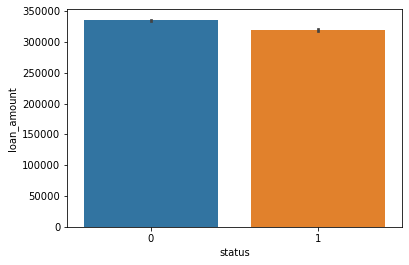

In [19]:
# Avg loan amount for loan status 1 and 0

sns.barplot(x = df['status'], y = df['loan_amount'])

<AxesSubplot:xlabel='status', ylabel='income'>

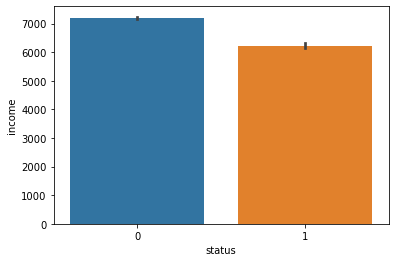

In [20]:
# Avg income for loan status 1 and 0

sns.barplot(x = df['status'], y = df['income'])

<AxesSubplot:xlabel='income', ylabel='Density'>

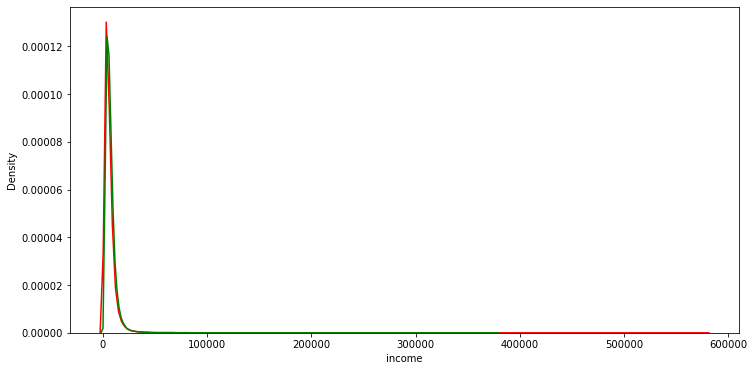

In [21]:
# Income distribution for loan status 1 and 0

plt.subplots(figsize = (12, 6))

sns.kdeplot(data=df, x=df['income'][df['status']==1], color='r')
sns.kdeplot(data=df, x=df['income'][df['status']==0], color='g')

<AxesSubplot:xlabel='loan_amount', ylabel='rate_of_interest'>

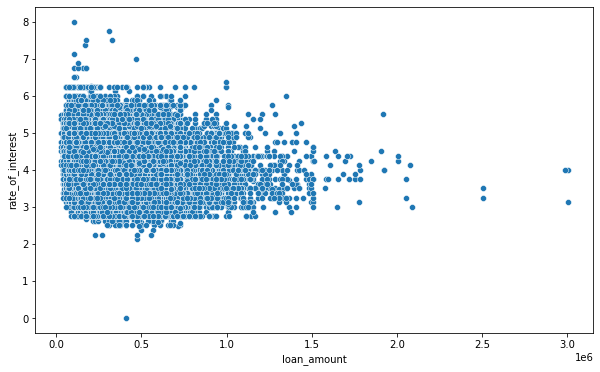

In [22]:
# Rate of interest vs Loan amount

plt.subplots(figsize = (10, 6))
sns.scatterplot(df['loan_amount'],df['rate_of_interest'])

<AxesSubplot:xlabel='loan_amount', ylabel='income'>

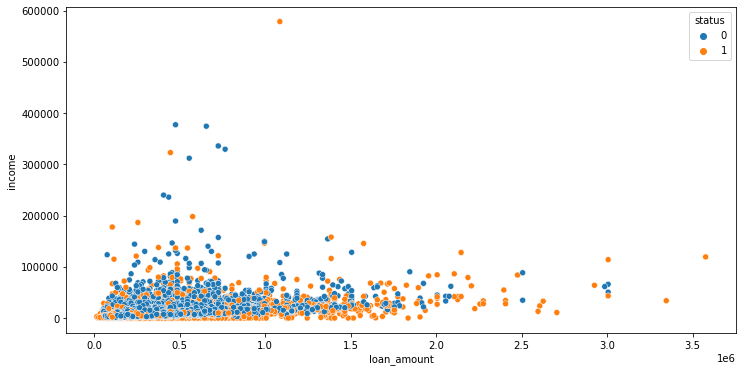

In [23]:
# Loan amount vs Income with Loan Status

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df['loan_amount'], y=df['income'], hue=df['status'])

<AxesSubplot:xlabel='loan_amount', ylabel='property_value'>

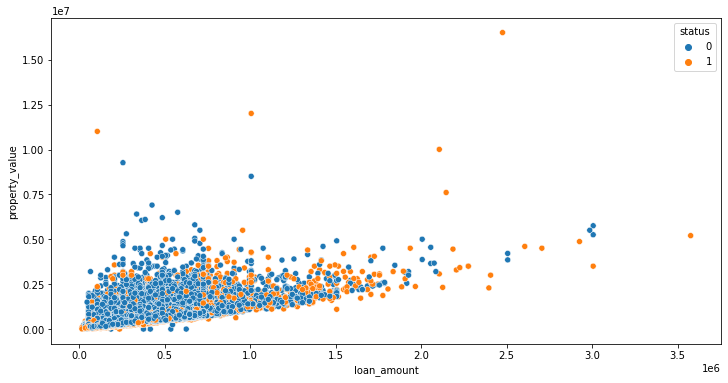

In [24]:
# Loan amount vs Property value with Loan Status

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df['loan_amount'], y=df['property_value'], hue=df['status'])

<AxesSubplot:xlabel='status', ylabel='credit_score'>

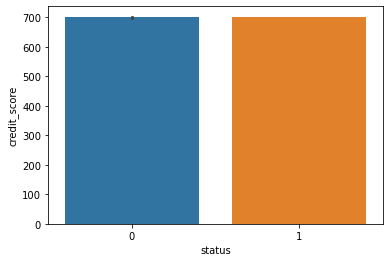

In [25]:
# Avg credit score for loan status 1 and 0

sns.barplot(x = df['status'], y = df['credit_score'])

<AxesSubplot:xlabel='gender', ylabel='loan_amount'>

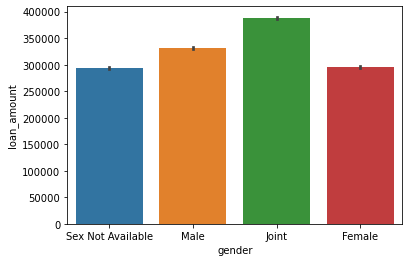

In [26]:
# Avg loan amount for different gender groups

sns.barplot(x = df['gender'], y = df['loan_amount'])

<AxesSubplot:xlabel='age', ylabel='loan_amount'>

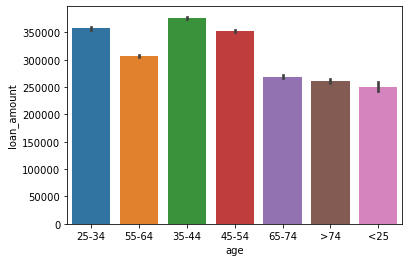

In [27]:
# Avg loan amount for different age groups

sns.barplot(x = df['age'], y = df['loan_amount'])

<AxesSubplot:xlabel='status', ylabel='dtir1'>

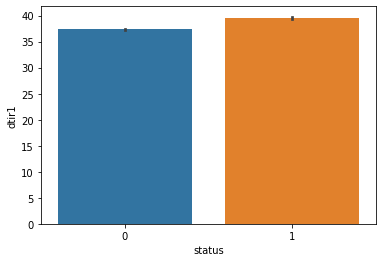

In [28]:
# Avg DTI for loan status 1 and 0

sns.barplot(x = df['status'], y = df['dtir1'])

<AxesSubplot:xlabel='income', ylabel='dtir1'>

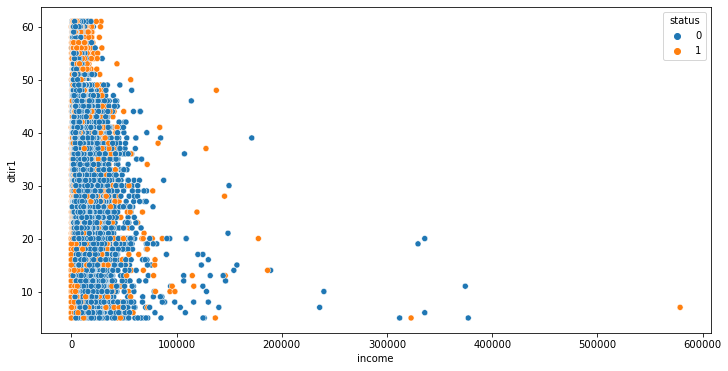

In [29]:
# Spread of DTI vs Income with Loan Status

plt.subplots(figsize = (12, 6))
sns.scatterplot(x=df['income'], y=df['dtir1'], hue=df['status'])

In [30]:
def bins(t):
    
    if t >= 96 and t < 156:
        return '8 - 13 years'
    elif t >= 156 and t < 216:
        return '13 - 18 years'
    elif t >= 216 and t < 276:
        return '18 - 23 years'
    elif t >= 276 and t < 336:
        return '23 - 28 years'
    elif t >= 336:
        return '28+ years'
    else:
        return np.nan

In [31]:
df['term_binned'] = df['term'].apply(bins)

In [32]:
df.isnull().sum()

loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
property_value               15098
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region                           0
status                           0
dtir1                        24121
term_binned                     41
dtype: int64

# Pre-processing

In [33]:
# train-test-split

x = df.drop('status', axis=1)
y = df['status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train.head()

(104069, 22)
(44601, 22)
(104069,)
(44601,)


,loan_limit,gender,approv_in_adv,loan_type,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,property_value,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,dtir1,term_binned
112148,NaN,Male,nopre,type1,nob/c,256500,4.56,1.2066,1315.84,360.0,not_neg,278000.0,4500.0,CRIF,605,CIB,35-44,not_inst,92.266187,North,45.0,28+ years
35678,cf,Joint,nopre,type1,nob/c,306500,NaN,NaN,NaN,360.0,not_neg,NaN,3300.0,EQUI,630,EXP,45-54,to_inst,NaN,south,NaN,28+ years
112037,cf,Joint,nopre,type1,nob/c,196500,NaN,NaN,NaN,360.0,not_neg,NaN,3180.0,EQUI,847,EXP,45-54,to_inst,NaN,central,NaN,28+ years
1165,cf,Male,nopre,type1,nob/c,126500,NaN,NaN,NaN,180.0,neg_amm,NaN,3660.0,EQUI,548,EXP,55-64,to_inst,NaN,central,NaN,13 - 18 years
14091,cf,Sex Not Available,nopre,type1,nob/c,346500,3.75,0.0910,4692.15,360.0,not_neg,608000.0,7200.0,EXP,716,EXP,65-74,to_inst,56.990132,south,37.0,28+ years


In [34]:
# Missing value treatment

x_train.isnull().sum()*100

loan_limit                    231300
gender                             0
approv_in_adv                  60700
loan_type                          0
business_or_commercial             0
loan_amount                        0
rate_of_interest             2543200
interest_rate_spread         2556900
upfront_charges              2769700
term                            3000
neg_ammortization               7700
property_value               1053000
income                        643300
credit_type                        0
credit_score                       0
co-applicant_credit_type           0
age                            13700
submission_of_application      13700
ltv                          1053000
region                             0
dtir1                        1687700
term_binned                     3000
dtype: int64

In [35]:
# Extracting names of cols with less than 5% null values

cols = [col for col in x_train.columns if x_train[col].isnull().mean() < 0.05 and x_train[col].isnull().mean() > 0]

cols

['loan_limit',
 'approv_in_adv',
 'term',
 'neg_ammortization',
 'age',
 'submission_of_application',
 'term_binned']

In [36]:
# All of these are cat variables: Hence using most_frequent strat from simpleimputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
x_train[cols] = imputer.fit_transform(x_train[cols])
x_test[cols] = imputer.transform(x_test[cols])

In [37]:
x_train.isnull().mean()*100

loan_limit                    0.000000
gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.437633
interest_rate_spread         24.569276
upfront_charges              26.614073
term                          0.000000
neg_ammortization             0.000000
property_value               10.118287
income                        6.181476
credit_type                   0.000000
credit_score                  0.000000
co-applicant_credit_type      0.000000
age                           0.000000
submission_of_application     0.000000
ltv                          10.118287
region                        0.000000
dtir1                        16.217125
term_binned                   0.000000
dtype: float64

In [38]:
x_test.isnull().mean()*100

loan_limit                    0.000000
gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.678819
interest_rate_spread         24.820071
upfront_charges              26.781911
term                          0.000000
neg_ammortization             0.000000
property_value               10.241923
income                        6.091792
credit_type                   0.000000
credit_score                  0.000000
co-applicant_credit_type      0.000000
age                           0.000000
submission_of_application     0.000000
ltv                          10.241923
region                        0.000000
dtir1                        16.241788
term_binned                   0.000000
dtype: float64

In [39]:
# Encoding cat variables for KNNimputer to work

enc_cols = list(x_train.select_dtypes(['object','category']).columns)
print(enc_cols)
num_cols = list(x_train.select_dtypes(['int64','float64']).columns)
print(num_cols)

['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'business_or_commercial', 'term', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'term_binned']
['loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'property_value', 'income', 'credit_score', 'ltv', 'dtir1']


In [40]:
# Ordinal Encoding

x_train.replace({'term_binned':{'8 - 13 years':0 , '13 - 18 years':1 , '18 - 23 years':2 , '23 - 28 years':3 , '28+ years':4}}, inplace=True)
x_train.replace({'age':{'<25':0 , '25-34':1 , '35-44':2 , '45-54':3 , '55-64':4, '65-74':5 , '>74':6}}, inplace=True)
x_test.replace({'term_binned':{'8 - 13 years':0 , '13 - 18 years':1 , '18 - 23 years':2 , '23 - 28 years':3 , '28+ years':4}}, inplace=True)
x_test.replace({'age':{'<25':0 , '25-34':1 , '35-44':2 , '45-54':3 , '55-64':4, '65-74':5 , '>74':6}}, inplace=True)

In [41]:
enc_df = pd.get_dummies(x_train[['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'business_or_commercial', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region']], drop_first=True)
enc_df2 = pd.get_dummies(x_test[['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'business_or_commercial', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region']], drop_first=True)

In [42]:
enc_df.head()

,loan_limit_ncf,gender_Joint,gender_Male,gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,business_or_commercial_nob/c,neg_ammortization_not_neg,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,region_North-East,region_central,region_south
112148,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0
35678,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1
112037,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0
1165,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
14091,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1


In [43]:
enc_df.shape

(104069, 17)

In [44]:
# dropping originals and concat with enc_df

x_train.drop(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'business_or_commercial', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region'], axis=1, inplace=True)
x_test.drop(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'business_or_commercial', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region'], axis=1, inplace=True)

x_train = pd.concat([x_train, enc_df], axis=1)
x_test = pd.concat([x_test, enc_df2], axis=1)
print(x_train.shape)
x_train.head()

(104069, 29)


,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,age,ltv,dtir1,term_binned,loan_limit_ncf,gender_Joint,gender_Male,gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,business_or_commercial_nob/c,neg_ammortization_not_neg,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,region_North-East,region_central,region_south
112148,256500,4.56,1.2066,1315.84,360.0,278000.0,4500.0,605,2,92.266187,45.0,4,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0
35678,306500,NaN,NaN,NaN,360.0,NaN,3300.0,630,3,NaN,NaN,4,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1
112037,196500,NaN,NaN,NaN,360.0,NaN,3180.0,847,3,NaN,NaN,4,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0
1165,126500,NaN,NaN,NaN,180.0,NaN,3660.0,548,4,NaN,NaN,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
14091,346500,3.75,0.0910,4692.15,360.0,608000.0,7200.0,716,5,56.990132,37.0,4,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1


In [45]:
# Encoding is done, moving to filling the rest of null values with KNNimputer

In [46]:
x_train.isnull().mean()*100

loan_amount                           0.000000
rate_of_interest                     24.437633
interest_rate_spread                 24.569276
upfront_charges                      26.614073
term                                  0.000000
property_value                       10.118287
income                                6.181476
credit_score                          0.000000
age                                   0.000000
ltv                                  10.118287
dtir1                                16.217125
term_binned                           0.000000
loan_limit_ncf                        0.000000
gender_Joint                          0.000000
gender_Male                           0.000000
gender_Sex Not Available              0.000000
approv_in_adv_pre                     0.000000
loan_type_type2                       0.000000
loan_type_type3                       0.000000
business_or_commercial_nob/c          0.000000
neg_ammortization_not_neg             0.000000
credit_type_C

In [47]:
# Extracting names of cols with more than 5% null values

cols2 = [col for col in x_train.columns if x_train[col].isnull().mean() > 0.05 and x_train[col].isnull().mean() < 0.50]

cols2

['rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'property_value',
 'income',
 'ltv',
 'dtir1']

In [48]:
x_train.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,age,ltv,dtir1,term_binned,loan_limit_ncf,gender_Joint,gender_Male,gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,business_or_commercial_nob/c,neg_ammortization_not_neg,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,region_North-East,region_central,region_south
112148,256500,4.56,1.2066,1315.84,360.0,278000.0,4500.0,605,2,92.266187,45.0,4,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0
35678,306500,NaN,NaN,NaN,360.0,NaN,3300.0,630,3,NaN,NaN,4,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1
112037,196500,NaN,NaN,NaN,360.0,NaN,3180.0,847,3,NaN,NaN,4,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0
1165,126500,NaN,NaN,NaN,180.0,NaN,3660.0,548,4,NaN,NaN,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
14091,346500,3.75,0.0910,4692.15,360.0,608000.0,7200.0,716,5,56.990132,37.0,4,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1


In [49]:
# from sklearn.impute import KNNImputer

# kimp = KNNImputer()

# x_train2 = pd.DataFrame(kimp.fit_transform(x_train), columns=x_train.columns)
# x_test2 = pd.DataFrame(kimp.transform(x_test), columns=x_test.columns)

In [50]:
from sklearn.impute import KNNImputer

kimp = KNNImputer()

kimp.fit(x_train)

x_train2 = kimp.transform(x_train)
x_test2 = kimp.transform(x_test)

x_train2 = pd.DataFrame(x_train2, columns=x_train.columns)
x_test2 = pd.DataFrame(x_test2, columns=x_test.columns)

In [51]:
x_train2.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,age,ltv,dtir1,term_binned,loan_limit_ncf,gender_Joint,gender_Male,gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,business_or_commercial_nob/c,neg_ammortization_not_neg,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,region_North-East,region_central,region_south
0,256500.0,4.560,1.20660,1315.840,360.0,278000.0,4500.0,605.0,2.0,92.266187,45.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,306500.0,3.423,0.00726,982.540,360.0,390000.0,3300.0,630.0,3.0,81.745846,45.6,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,196500.0,3.723,0.28742,584.490,360.0,224000.0,3180.0,847.0,3.0,88.196466,42.2,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,126500.0,4.023,0.91148,2795.796,180.0,214000.0,3660.0,548.0,4.0,71.035481,39.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,346500.0,3.750,0.09100,4692.150,360.0,608000.0,7200.0,716.0,5.0,56.990132,37.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [52]:
# pre-processing done

In [53]:
x_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104069 entries, 0 to 104068
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   loan_amount                        104069 non-null  float64
 1   rate_of_interest                   104069 non-null  float64
 2   interest_rate_spread               104069 non-null  float64
 3   upfront_charges                    104069 non-null  float64
 4   term                               104069 non-null  float64
 5   property_value                     104069 non-null  float64
 6   income                             104069 non-null  float64
 7   credit_score                       104069 non-null  float64
 8   age                                104069 non-null  float64
 9   ltv                                104069 non-null  float64
 10  dtir1                              104069 non-null  float64
 11  term_binned                        1040

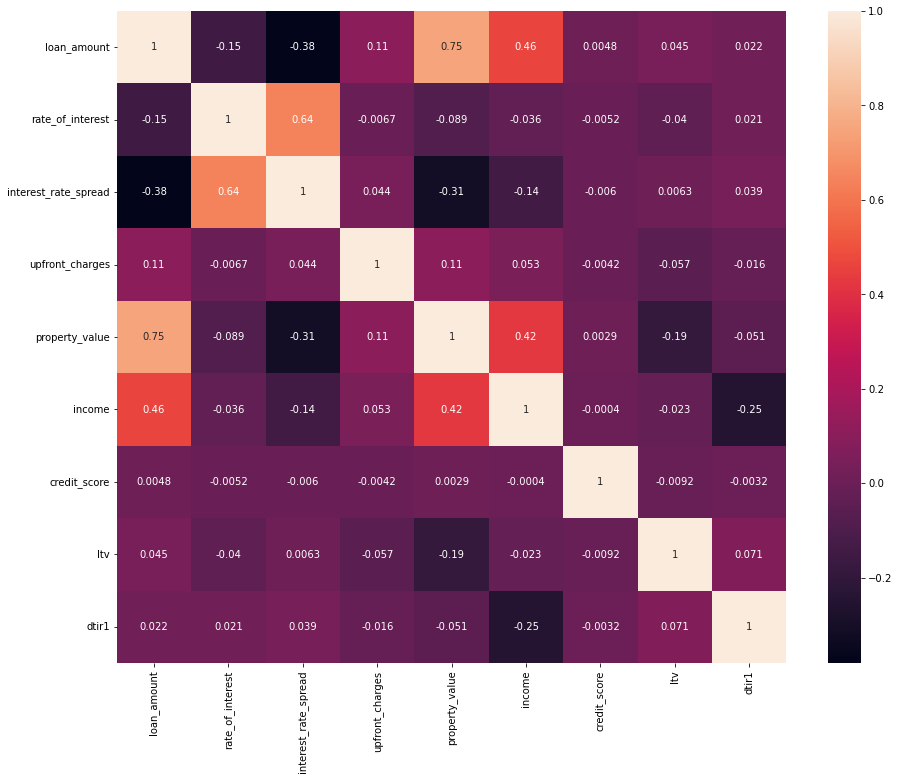

In [54]:
# Correlation

plt.figure(figsize=(15,12))
sns.heatmap(x_train2[num_cols].corr(), annot = True)
plt.show()

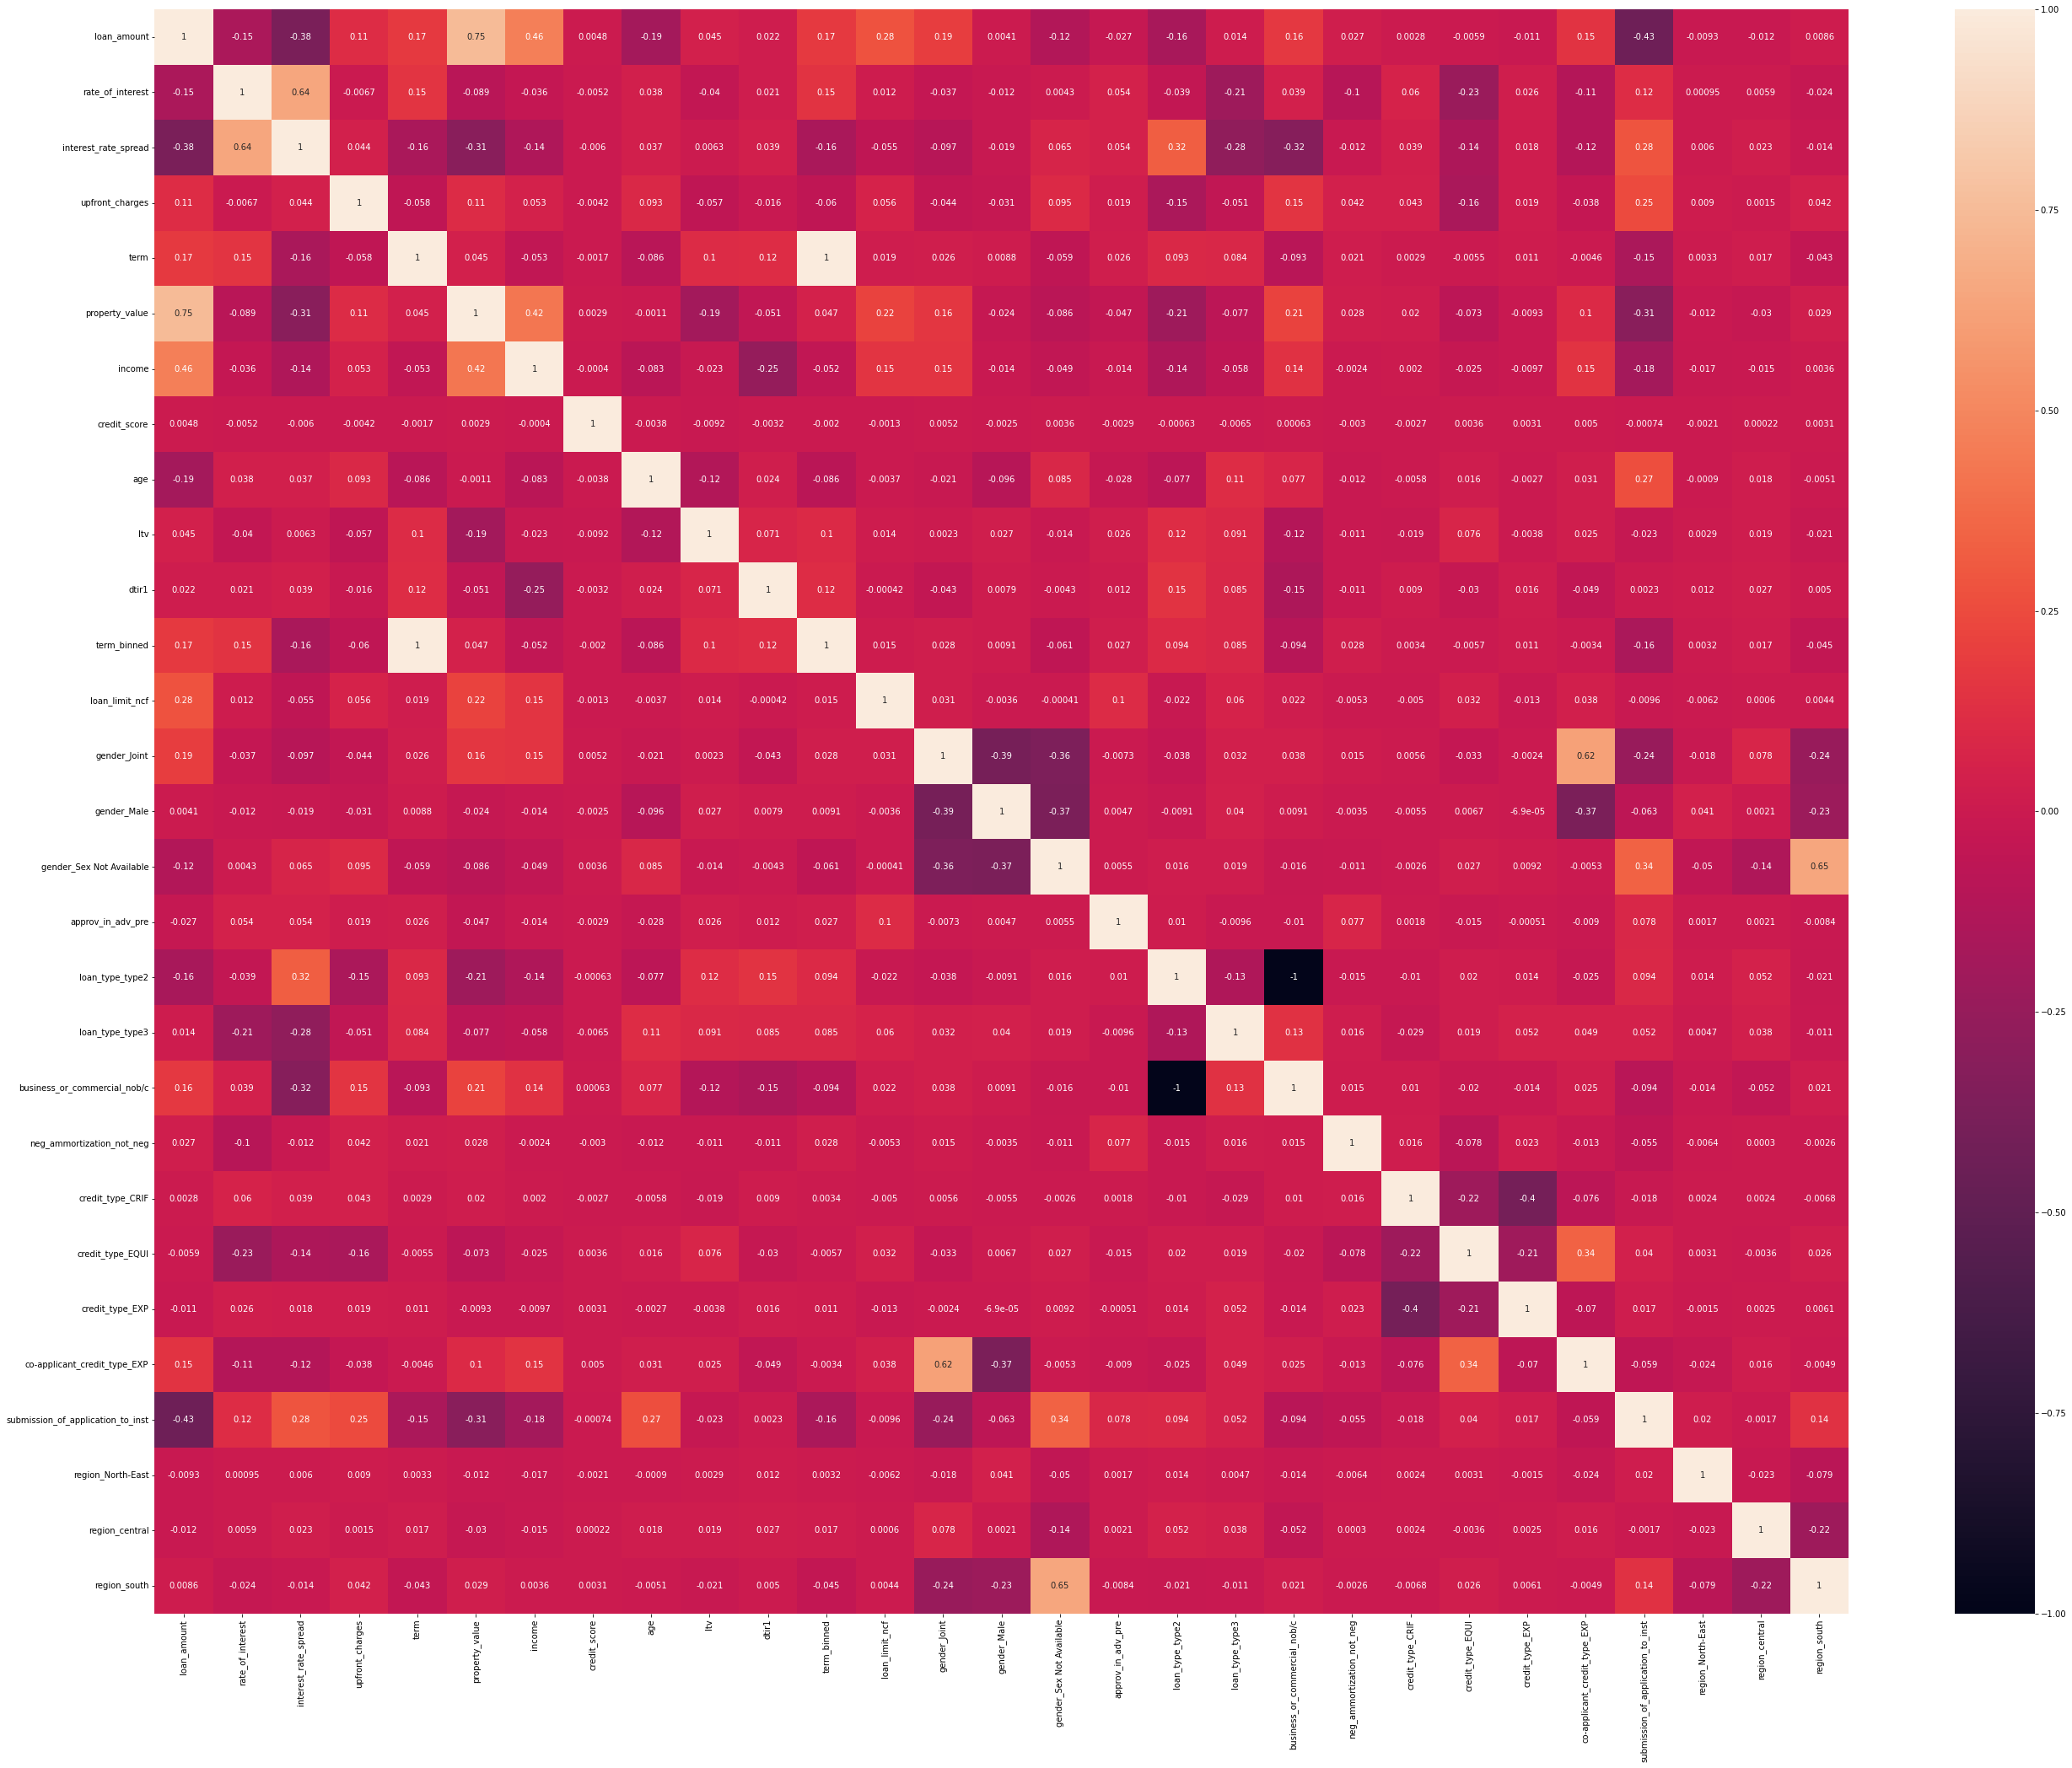

In [55]:
# Correlation

plt.figure(figsize=(45,35))
sns.heatmap(x_train2.corr(), annot = True)
plt.show()

In [56]:
# dropping term col

x_train2.drop('term', axis=1, inplace=True)
x_test2.drop('term', axis=1, inplace=True)

In [57]:
x2 = pd.concat([x_train2,x_test2])

In [58]:
y_train.value_counts()

0    78500
1    25569
Name: status, dtype: int64

In [59]:
# base model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(random_state=56)
lr2 = LogisticRegression(class_weight='balanced', random_state=56)
dt = DecisionTreeClassifier(random_state=56)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=56)
rf2 = RandomForestClassifier(class_weight='balanced', random_state=56)

models = [lr,lr2,dt,knn,rf,rf2]

for m in models:
    m.fit(x_train2, y_train)
    print(m, ':', m.score(x_train2, y_train).round(4), m.score(x_test2, y_test).round(4))

LogisticRegression(random_state=56) : 0.7543 0.7518
LogisticRegression(class_weight='balanced', random_state=56) : 0.5781 0.581
DecisionTreeClassifier(random_state=56) : 1.0 0.9577
KNeighborsClassifier() : 0.8575 0.8006
RandomForestClassifier(random_state=56) : 1.0 0.9459
RandomForestClassifier(class_weight='balanced', random_state=56) : 1.0 0.942


In [60]:
# Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()

scaler.fit(x_train2)

x_train_scaled = scaler.transform(x_train2)
x_test_scaled = scaler.transform(x_test2)

x_train2 = pd.DataFrame(x_train_scaled, columns=x_train2.columns)
x_test2 = pd.DataFrame(x_test_scaled, columns=x_test2.columns)

x_train2.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,property_value,income,credit_score,age,ltv,dtir1,term_binned,loan_limit_ncf,gender_Joint,gender_Male,gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,business_or_commercial_nob/c,neg_ammortization_not_neg,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,region_North-East,region_central,region_south
0,-0.405842,1.089665,1.630397,-0.542802,-0.606157,-0.382732,-0.816045,-0.802715,0.431236,0.712229,0.430807,-0.269259,-0.622535,1.585767,-0.582584,-0.428938,-0.40306,-0.332765,0.40306,0.337183,1.546814,-0.337978,-0.621554,-0.999606,-1.349553,-0.0908,-0.249203,-0.870980
1,-0.134221,-1.032621,-0.800098,-0.655668,-0.285894,-0.571082,-0.600451,-0.097755,0.185739,0.771910,0.430807,-0.269259,1.606336,-0.630610,-0.582584,-0.428938,-0.40306,-0.332765,0.40306,0.337183,-0.646490,2.958773,-0.621554,1.000394,0.740986,-0.0908,-0.249203,1.148132
2,-0.731787,-0.472651,-0.232346,-0.790461,-0.760569,-0.589917,1.270904,-0.097755,0.336267,0.433719,0.430807,-0.269259,1.606336,-0.630610,-0.582584,-0.428938,-0.40306,-0.332765,0.40306,0.337183,-0.646490,2.958773,-0.621554,1.000394,0.740986,-0.0908,4.012798,-0.870980
3,-1.112056,0.087319,1.032328,-0.041640,-0.789164,-0.514577,-1.307600,0.607204,-0.064192,0.194997,-2.644485,-0.269259,-0.622535,1.585767,-0.582584,-0.428938,-0.40306,-0.332765,0.40306,-2.965746,-0.646490,2.958773,-0.621554,1.000394,0.740986,-0.0908,4.012798,-0.870980
4,0.083076,-0.422254,-0.630397,0.600529,0.337475,0.041056,0.141192,1.312164,-0.391947,-0.083513,0.430807,-0.269259,-0.622535,-0.630610,1.716491,-0.428938,-0.40306,-0.332765,0.40306,0.337183,-0.646490,-0.337978,1.608870,1.000394,0.740986,-0.0908,-0.249203,1.148132


In [61]:
for m in models:
    m.fit(x_train2, y_train)
    print(m, ':', m.score(x_train2, y_train).round(4), m.score(x_test2, y_test).round(4))

LogisticRegression(random_state=56) : 0.8657 0.8667
LogisticRegression(class_weight='balanced', random_state=56) : 0.8278 0.8283
DecisionTreeClassifier(random_state=56) : 1.0 0.9579
KNeighborsClassifier() : 0.9101 0.8777
RandomForestClassifier(random_state=56) : 1.0 0.9461
RandomForestClassifier(class_weight='balanced', random_state=56) : 1.0 0.9427


In [62]:
# as expected scaling increased the score for Log Regression and KNN but
# Dt and random forest are giving the best accuracy
# cross-validation

for m in models:
    scores = cross_val_score(m, pd.concat([x_train2, x_test2]), pd.concat([y_train, y_test]), cv=5, scoring='f1')
    print(m)
    print(scores)
    print('Mean=', scores.mean())
    print('Std=', scores.std())
    print()

LogisticRegression(random_state=56)
[0.64411922 0.64674153 0.6436289  0.65115866 0.64988884]
Mean= 0.6471074302323083
Std= 0.003010388122743349

LogisticRegression(class_weight='balanced', random_state=56)
[0.66512793 0.66502431 0.66356182 0.66884006 0.66845726]
Mean= 0.6662022768916537
Std= 0.0020763735262137855

DecisionTreeClassifier(random_state=56)
[0.90269939 0.90932502 0.91716377 0.9263904  0.91888216]
Mean= 0.9148921516050557
Std= 0.008160227216046428

KNeighborsClassifier()
[0.71524128 0.71163122 0.71632104 0.71669316 0.70984167]
Mean= 0.7139456747054819
Std= 0.0027228360374587546

RandomForestClassifier(random_state=56)
[0.88248797 0.8891012  0.88777835 0.89437606 0.88617826]
Mean= 0.8879843677302899
Std= 0.00388885338604608

RandomForestClassifier(class_weight='balanced', random_state=56)
[0.87520525 0.87823372 0.87600476 0.87978509 0.87277335]
Mean= 0.8764004351283752
Std= 0.0024313619849881487



In [63]:
# decision tree and random forest have the highest f1 scores 
from sklearn.metrics import classification_report

model2 = [dt,rf,rf2]

for m in model2:
    print(m)
    m.fit(x_train2, y_train)
    y_test_pred = m.predict(x_test2)
    print('Test Classification report:')
    print(classification_report(y_test,y_test_pred))
    y_train_pred = m.predict(x_train2)
    print('Train Classification report:')
    print(classification_report(y_train, y_train_pred))
    print()

DecisionTreeClassifier(random_state=56)
Test Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33531
           1       0.91      0.92      0.92     11070

    accuracy                           0.96     44601
   macro avg       0.94      0.94      0.94     44601
weighted avg       0.96      0.96      0.96     44601

Train Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78500
           1       1.00      1.00      1.00     25569

    accuracy                           1.00    104069
   macro avg       1.00      1.00      1.00    104069
weighted avg       1.00      1.00      1.00    104069


RandomForestClassifier(random_state=56)
Test Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     33531
           1       0.96      0.81      0.88     11070

    accuracy    

In [64]:
# Decision tree has the highest f1 score and the highest recall score as well

In [65]:
# hype tuning to see if we can get a better f1 score

from sklearn.model_selection import GridSearchCV
m1 = DecisionTreeClassifier(random_state=56)

params = [{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2,3,4,5,6,7], 'min_samples_leaf': [1,2,3,4,5]}]

gs = GridSearchCV(estimator=m1, param_grid=params, scoring='f1', cv=5, verbose=1, n_jobs=-1)

gs.fit(x_train2,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=56), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 3, 4, 5, 6, 7],
                          'splitter': ['best', 'random']}],
             scoring='f1', verbose=1)

In [66]:
gs.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [67]:
gs.best_score_

0.9278168265433366

In [68]:
dt2 = DecisionTreeClassifier(random_state=56, criterion='entropy', splitter='best', min_samples_leaf=4, min_samples_split=2)
model2 = [dt2]

for m in model2:
    print(m)
    m.fit(x_train2, y_train)
    y_test_pred = m.predict(x_test2)
    print('Test Classification report:')
    print(classification_report(y_test,y_test_pred))
    y_train_pred = m.predict(x_train2)
    print('Train Classification report:')
    print(classification_report(y_train, y_train_pred))
    print()

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=56)
Test Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     33531
           1       0.94      0.92      0.93     11070

    accuracy                           0.97     44601
   macro avg       0.96      0.95      0.96     44601
weighted avg       0.97      0.97      0.97     44601

Train Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     78500
           1       0.99      0.97      0.98     25569

    accuracy                           0.99    104069
   macro avg       0.99      0.98      0.99    104069
weighted avg       0.99      0.99      0.99    104069


